# Data

In [9]:
import os
import pandas as pd
print(os.getcwd())

# Load the full segments file
eeg = pd.read_csv("../data/challenger_insight_eeg_segments_5000.csv")

# Quick check
print(eeg.shape)
print(eeg.columns)
eeg.head()


/Users/rubyhong/challenger-insight/notebooks
(5000, 28)
Index(['subject_id', 'session_id', 'segment_idx', 'timestamp', 'role', 'team',
       'modality', 'stimulus_type', 'task_difficulty', 'prior_knowledge_lvl',
       'self_report_engagement_5pt', 'self_report_fatigue_5pt', 'delta_power',
       'theta_power', 'alpha_power', 'beta_power', 'gamma_power',
       'theta_alpha_ratio', 'beta_alpha_ratio', 'theta_beta_ratio',
       'spectral_entropy', 'eye_blink_artifact', 'muscle_artifact',
       'motion_artifact', 'cognitive_load_score', 'engaged_label',
       'disengagement_risk', 'recommended_trigger'],
      dtype='object')


,subject_id,session_id,segment_idx,timestamp,role,team,modality,stimulus_type,task_difficulty,prior_knowledge_lvl,...,beta_alpha_ratio,theta_beta_ratio,spectral_entropy,eye_blink_artifact,muscle_artifact,motion_artifact,cognitive_load_score,engaged_label,disengagement_risk,recommended_trigger
0,S001,U8KXB4N9,0,2025-04-01 14:00:00,SRE,Platform,Live Workshop,Discussion,Easy,3,...,0.5855,1.4546,0.9669,0,0,0,0.2814,1,0.4746,0
1,S001,U8KXB4N9,1,2025-04-01 14:00:10,SRE,Platform,Live Workshop,Discussion,Easy,3,...,0.9504,1.5159,0.9742,0,0,0,0.2993,1,0.4635,0
2,S001,U8KXB4N9,2,2025-04-01 14:00:20,SRE,Platform,Live Workshop,Discussion,Easy,3,...,0.4811,2.3397,0.9688,0,0,0,0.2764,1,0.4964,0
3,S001,U8KXB4N9,3,2025-04-01 14:00:30,SRE,Platform,Live Workshop,Discussion,Easy,3,...,0.5371,1.7025,0.9444,1,1,0,0.2125,1,0.6233,0
4,S001,U8KXB4N9,4,2025-04-01 14:00:40,SRE,Platform,Live Workshop,Discussion,Easy,3,...,0.7848,0.9681,0.8344,0,0,0,0.2862,0,0.4715,0


# Create Dataframe

In [10]:
band_cols = [
    "delta_power",
    "theta_power",
    "alpha_power",
    "beta_power",
    "gamma_power"
]

ratio_cols = [
    "theta_alpha_ratio",
    "beta_alpha_ratio",
    "theta_beta_ratio"
]

label_cols = [
    "engaged_label",        # classification target
    "disengagement_risk"    # early-warning score
]


In [11]:
# Select only the columns we need for PCA + modeling
df = eeg[band_cols + ratio_cols + label_cols]

df.head(), df.shape

(   delta_power  theta_power  alpha_power  beta_power  gamma_power  \
 0       2.2473       1.3620       1.5964      0.9354       0.9980   
 1       1.6761       1.4147       0.9799      0.9322       0.7717   
 2       1.8343       1.6506       1.4633      0.7045       1.0507   
 3       1.8669       1.4182       1.5481      0.8320       0.4949   
 4       3.1678       0.8671       1.1389      0.8947       0.2875   
 
    theta_alpha_ratio  beta_alpha_ratio  theta_beta_ratio  engaged_label  \
 0             0.8526            0.5855            1.4546              1   
 1             1.4423            0.9504            1.5159              1   
 2             1.1272            0.4811            2.3397              1   
 3             0.9155            0.5371            1.7025              1   
 4             0.7606            0.7848            0.9681              0   
 
    disengagement_risk  
 0              0.4746  
 1              0.4635  
 2              0.4964  
 3              0.62

In [12]:
df.isna().sum()


delta_power           0
theta_power           0
alpha_power           0
beta_power            0
gamma_power           0
theta_alpha_ratio     0
beta_alpha_ratio      0
theta_beta_ratio      0
engaged_label         0
disengagement_risk    0
dtype: int64

In [13]:
df.describe()


,delta_power,theta_power,alpha_power,beta_power,gamma_power,theta_alpha_ratio,beta_alpha_ratio,theta_beta_ratio,engaged_label,disengagement_risk
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.027991,1.318643,1.078414,1.032862,0.802832,1.317786,1.033168,1.368753,0.612800,0.386554
std,0.520835,0.342701,0.297954,0.272436,0.253285,0.518475,0.410601,0.535347,0.487159,0.083436
min,0.764600,0.493100,0.385300,0.367900,0.245100,0.316000,0.268400,0.310500,0.000000,0.082200
25%,1.652625,1.070450,0.867575,0.842675,0.620700,0.952450,0.737675,0.991675,0.000000,0.331175
50%,1.971300,1.275100,1.034400,1.000600,0.769700,1.224000,0.961700,1.269550,1.000000,0.388900
75%,2.316425,1.513550,1.246025,1.189500,0.947900,1.576625,1.245575,1.633825,1.000000,0.445100
max,4.568300,3.120900,2.877700,2.711000,2.197800,5.192200,3.669800,5.159100,1.000000,0.661000


# PCA(Principal Component Analysis) for Exploration

In [18]:
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler


features = df[band_cols + ratio_cols]   # 8 columns total
X = features.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(5000, 8)

In [19]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("Explained variance ratio:\n", explained)
print("\nCumulative explained variance:\n", cum_explained)


Explained variance ratio:
 [0.31125219 0.30520645 0.12713946 0.12207354 0.11366984 0.00930643
 0.00875744 0.00259466]

Cumulative explained variance:
 [0.31125219 0.61645863 0.7435981  0.86567164 0.97934148 0.9886479
 0.99740534 1.        ]


In [20]:
features.columns

Index(['delta_power', 'theta_power', 'alpha_power', 'beta_power',
       'gamma_power', 'theta_alpha_ratio', 'beta_alpha_ratio',
       'theta_beta_ratio'],
      dtype='object')

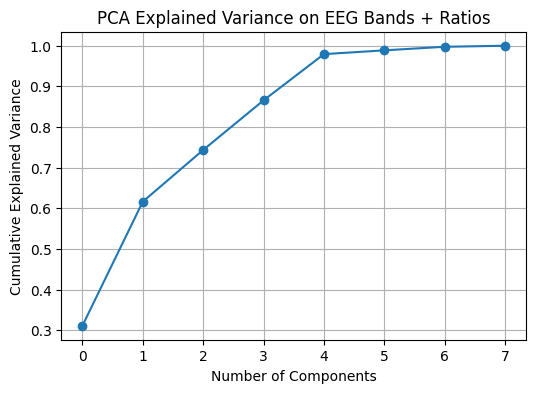

In [21]:
import matplotlib.pyplot as plt

# Plot cumulative variance curve
# helps you decide how many PCs are “meaningful.”

plt.figure(figsize=(6,4))
plt.plot(cum_explained, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance on EEG Bands + Ratios")
plt.grid(True)
plt.show()


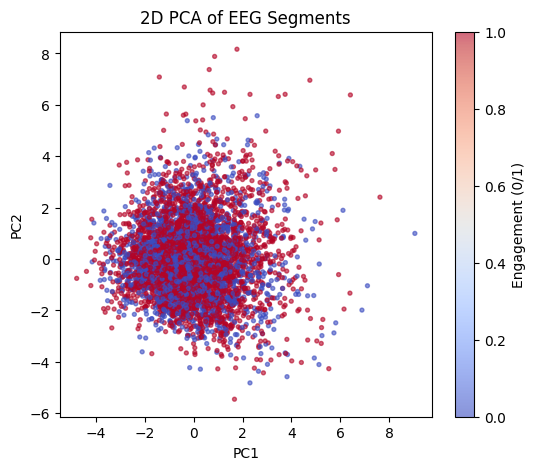

In [22]:
# Reduce to 2 components
# 2D PCA Scatter Plot (colored by engagement)
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

y = df["engaged_label"]

plt.figure(figsize=(6,5))
plt.scatter(X_pca2[:,0], X_pca2[:,1],
            c=y, s=8, alpha=0.6, cmap="coolwarm")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA of EEG Segments")
plt.colorbar(label="Engagement (0/1)")
plt.show()


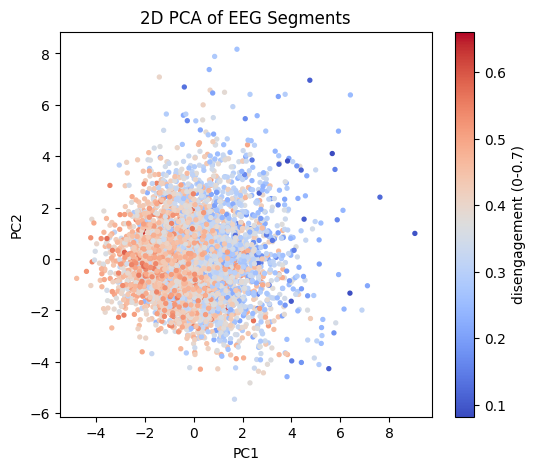

In [23]:
# disengagement_risk label 
plt.figure(figsize=(6,5))
plt.scatter(X_pca2[:,0], X_pca2[:,1],
            c=df["disengagement_risk"], s=8, alpha=1, cmap="coolwarm")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA of EEG Segments")
plt.colorbar(label="disengagement (0-0.7)")
plt.show()

Look for:
- Any clusters: One large blob
- Separation between engaged/disengaged: No color separation (blue/red mixed evenly)
- Patterns along PC1 or PC2: Circle centered near (0,0), with 3–4 radius


=> EEG bands + ratios are moderately noisy, lack strong unsupervised structure, and engagement differences are subtle.

# T-Distributed Stochastic Neighbor Embedding (t-SNE) 
an algorithm for performing dimensionality reduction, allowing visualization of complex multi-dimensional data in fewer dimensions while still maintaining the structure of the data.


In [25]:
from sklearn.manifold import TSNE

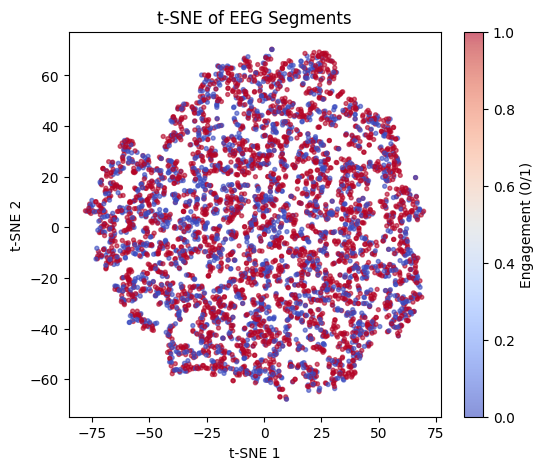

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    max_iter=1000,
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1],
            c=y, s=8, alpha=0.6, cmap="coolwarm")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE of EEG Segments")
plt.colorbar(label="Engagement (0/1)")
plt.show()


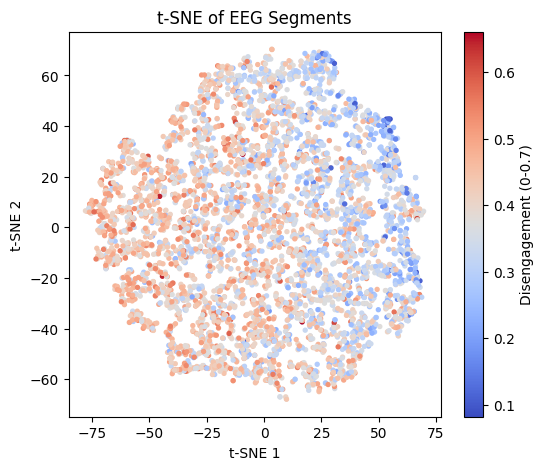

In [28]:
plt.figure(figsize=(6,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1],
            c=df["disengagement_risk"], s=8, alpha=1, cmap="coolwarm")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE of EEG Segments")
plt.colorbar(label="Disengagement (0-0.7)")
plt.show()

### Interpretation
PCA and t-SNE revealed that disengagement_risk varies smoothly along the first principal component, indicating a strong continuous relationship between EEG features and the risk score. In contrast, the engaged_label does not form distinct clusters and appears mixed across the feature manifold, suggesting that binary engagement states are harder to separate based on bandpower and ratio features alone.

This suggests that classification models may struggle with binary engagement but can leverage nonlinear structure (e.g., with Random Forests) to extract meaningful patterns. Early-warning thresholding on disengagement_risk is appropriate, as it correlates with the dominant direction of EEG variance.

# Build classification models
Split the data

Train Logistic Regression

Train Random Forest

Evaluate both with full metrics

Compare them to understand what the PCA/t-SNE hinted at

In [29]:
band_cols = ["delta_power","theta_power","alpha_power","beta_power","gamma_power"]
ratio_cols = ["theta_alpha_ratio","beta_alpha_ratio","theta_beta_ratio"]

X = df[band_cols + ratio_cols]
y = df["engaged_label"]
X.shape, y.shape


((5000, 8), (5000,))

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


engaged_label
1    0.61275
0    0.38725
Name: proportion, dtype: float64
engaged_label
1    0.613
0    0.387
Name: proportion, dtype: float64


### Logistic Regression (with scaling)
LR is sensitive to feature scales.

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_reg_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(
        max_iter=1000,
        solver="lbfgs",
        class_weight="balanced"   # helps when classes are imbalanced
    ))
])

log_reg_clf.fit(X_train, y_train)

y_pred_log = log_reg_clf.predict(X_test)
y_proba_log = log_reg_clf.predict_proba(X_test)[:, 1]


### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=5,
    random_state=42,
    class_weight="balanced_subsample"
)

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]


In [33]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)

def evaluate_model(y_true, y_pred, y_proba, name):
    print(f"======= {name} =======")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.3f}")
    print(f"F1 score:  {f1_score(y_true, y_pred):.3f}")
    print(f"ROC AUC:   {roc_auc_score(y_true, y_proba):.3f}")
    print()
    print("Classification report:")
    print(classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_log, y_proba_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf,  y_proba_rf,  "Random Forest")


======= Logistic Regression =======
Accuracy:  0.497
Precision: 0.636
Recall:    0.419
F1 score:  0.505
ROC AUC:   0.527

Classification report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49       387
           1       0.64      0.42      0.51       613

    accuracy                           0.50      1000
   macro avg       0.52      0.52      0.50      1000
weighted avg       0.55      0.50      0.50      1000

======= Random Forest =======
Accuracy:  0.565
Precision: 0.624
Recall:    0.731
F1 score:  0.673
ROC AUC:   0.519

Classification report:
              precision    recall  f1-score   support

           0       0.41      0.30      0.35       387
           1       0.62      0.73      0.67       613

    accuracy                           0.56      1000
   macro avg       0.52      0.52      0.51      1000
weighted avg       0.54      0.56      0.55      1000



<Figure size 600x600 with 0 Axes>

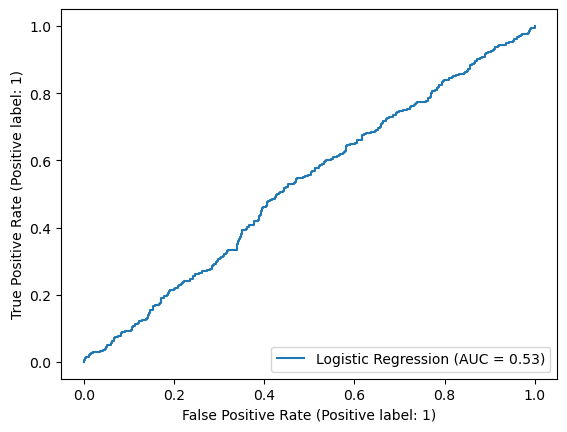

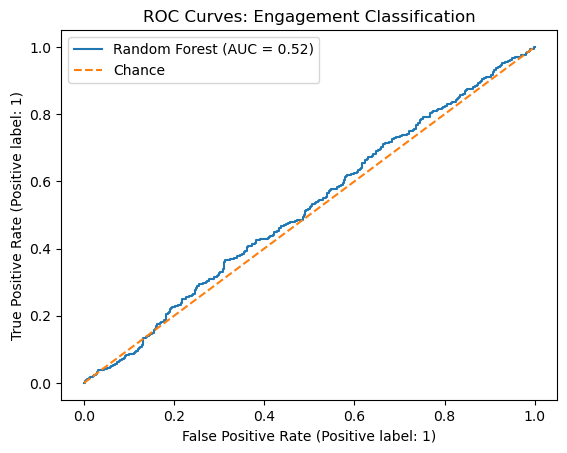

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

RocCurveDisplay.from_predictions(y_test, y_proba_log, name="Logistic Regression")
RocCurveDisplay.from_predictions(y_test, y_proba_rf,  name="Random Forest")

plt.plot([0,1],[0,1],"--", label="Chance")
plt.legend()
plt.title("ROC Curves: Engagement Classification")
plt.show()



### Gradient Boosting Models
[ XGBoost ]
- Handles nonlinear EEG relationships
- Strong with modest feature counts
- Can learn subtle patterns even when PCA shows no clear clusters

[ CatBoost ]
- no scaling needed
- great with categorical data
- performs well when labels are noisy, nonlinear interactions matter, small/medium datasets

In [44]:
import xgboost, catboost

In [45]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, cv, Pool

In [47]:
# xgb = XGBClassifier(
#     n_estimators=300,
#     learning_rate=0.05,
#     max_depth=4,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     eval_metric="logloss"
# )

# xgb.fit(X_train, y_train)

# y_pred_xgb = xgb.predict(X_test)
# y_proba_xgb = xgb.predict_proba(X_test)[:, 1]


In [42]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=False
)

cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)
y_proba_cat = cat.predict_proba(X_test)[:, 1]


In [49]:
evaluate_model(y_test, y_pred_cat, y_proba_cat, "CatBoost")

======= CatBoost =======
Accuracy:  0.581
Precision: 0.612
Recall:    0.863
F1 score:  0.716
ROC AUC:   0.517

Classification report:
              precision    recall  f1-score   support

           0       0.38      0.13      0.20       387
           1       0.61      0.86      0.72       613

    accuracy                           0.58      1000
   macro avg       0.50      0.50      0.46      1000
weighted avg       0.52      0.58      0.52      1000



<Figure size 600x600 with 0 Axes>

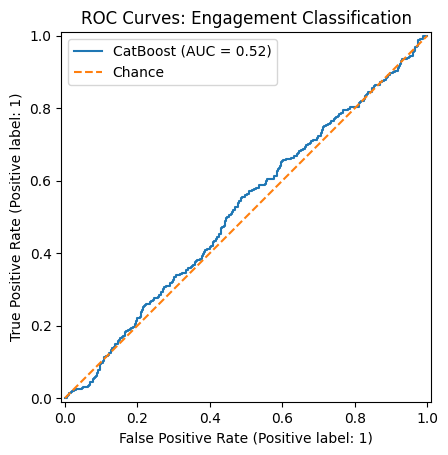

In [50]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(6,6))

RocCurveDisplay.from_predictions(y_test, y_proba_cat, name="CatBoost")

plt.plot([0,1],[0,1],"--", label="Chance")
plt.legend()
plt.title("ROC Curves: Engagement Classification")
plt.show()


### LABEL DECISION>> 

The binary engagement_label was generated by Bernoulli sampling from an underlying engagement probability, making it intentionally noisy. This explains why classification models achieve only modest accuracy. In contrast, disengagement_risk is a continuous and structured score aligned with the principal components of EEG bandpower features.

Therefore, classification of engagement_label is inherently difficult, while predicting disengagement_risk or thresholding it for early-warning is much more reliable.

# early-warning thresholding

In [51]:
risk = df["disengagement_risk"]
engaged = df["engaged_label"]
disengaged = (df["engaged_label"] == 0).astype(int)


In [52]:
from sklearn.model_selection import train_test_split

risk_train, risk_test, disengaged_train, disengaged_test = train_test_split(
    risk, disengaged,
    test_size=0.2,
    random_state=42,
    stratify=disengaged
)


In [54]:
thresholds = np.linspace(risk_train.min(), risk_train.max(), 50)

results = []

for t in thresholds:
    trigger_pred = (risk_train >= t).astype(int)
    
    prec = precision_score(disengaged_train, trigger_pred, zero_division=0)
    rec  = recall_score(disengaged_train, trigger_pred)
    f1   = f1_score(disengaged_train, trigger_pred)
    
    results.append((t, prec, rec, f1))

import pandas as pd
results_df = pd.DataFrame(results, columns=["threshold", "precision", "recall", "f1"])



In [60]:
# best_row = results_df.loc[results_df["recall"].idxmax()]
best_row = results_df.loc[results_df["f1"].idxmax()]
best_thresh = best_row["threshold"]
print(best_row)


threshold    0.259384
precision    0.397691
recall       0.956101
f1           0.561730
Name: 15, dtype: float64


In [57]:
trigger_test = (risk_test >= best_thresh).astype(int)

prec_test = precision_score(disengaged_test, trigger_test, zero_division=0)
rec_test  = recall_score(disengaged_test, trigger_test)
f1_test   = f1_score(disengaged_test, trigger_test)

trigger_rate = trigger_test.mean()


In [58]:
print("=== Early-Warning Test Performance ===")
print(f"Threshold:       {best_thresh:.3f}")
print(f"Precision:       {prec_test:.3f}")
print(f"Recall:          {rec_test:.3f}")
print(f"F1 Score:        {f1_test:.3f}")
print(f"Trigger Rate:    {trigger_rate:.3f}")


=== Early-Warning Test Performance ===
Threshold:       0.259
Precision:       0.398
Recall:          0.964
F1 Score:        0.563
Trigger Rate:    0.937
